In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Update function for Rescorla-Wagner model
def update_rescorla_wagner(rewards, alpha):
    n_trials = rewards.shape[0]
    V = np.zeros(n_trials)
    delta = np.zeros(n_trials)
    for n in range(n_trials - 1):
        delta[n] = rewards[n] - V[n]
        V[n + 1] = V[n] + alpha * delta[n]
    return V, delta

# Update function for Pearce-Hall model
def update_pearce_hall(rewards, alpha0, K, eta):
    n_trials = rewards.shape[0]
    V = np.zeros(n_trials)
    alpha = np.zeros(n_trials)
    alpha[0] = alpha0
    delta = np.zeros(n_trials)
    for n in range(n_trials - 1):
        delta[n] = rewards[n] - V[n]
        V[n + 1] = V[n] + K * alpha[n] * delta[n]
        alpha[n + 1] = eta * abs(delta[n]) + (1 - eta) * alpha[n]
    return V, alpha, delta

In [ ]:
# Define constants for the models
K = 0.1  # Example constant for K
eta = 0.4  # Example constant for eta (usually between 0 and 1)
alpha_RW = 0.2  # Example constant learning rate for Rescorla-Wagner model
alpha0_PH = 0.1  # initial learning rate, starting with an arbitrary small associability

# Number of trials
n_trials = 200

# Generate a series of rewards with different volatilities
np.random.seed(0)  # for reproducibility
less_volatile_rewards = np.random.normal(1, 0.1, n_trials)  # low volatility
more_volatile_rewards = np.random.normal(1, 0.5, n_trials)  # high volatility

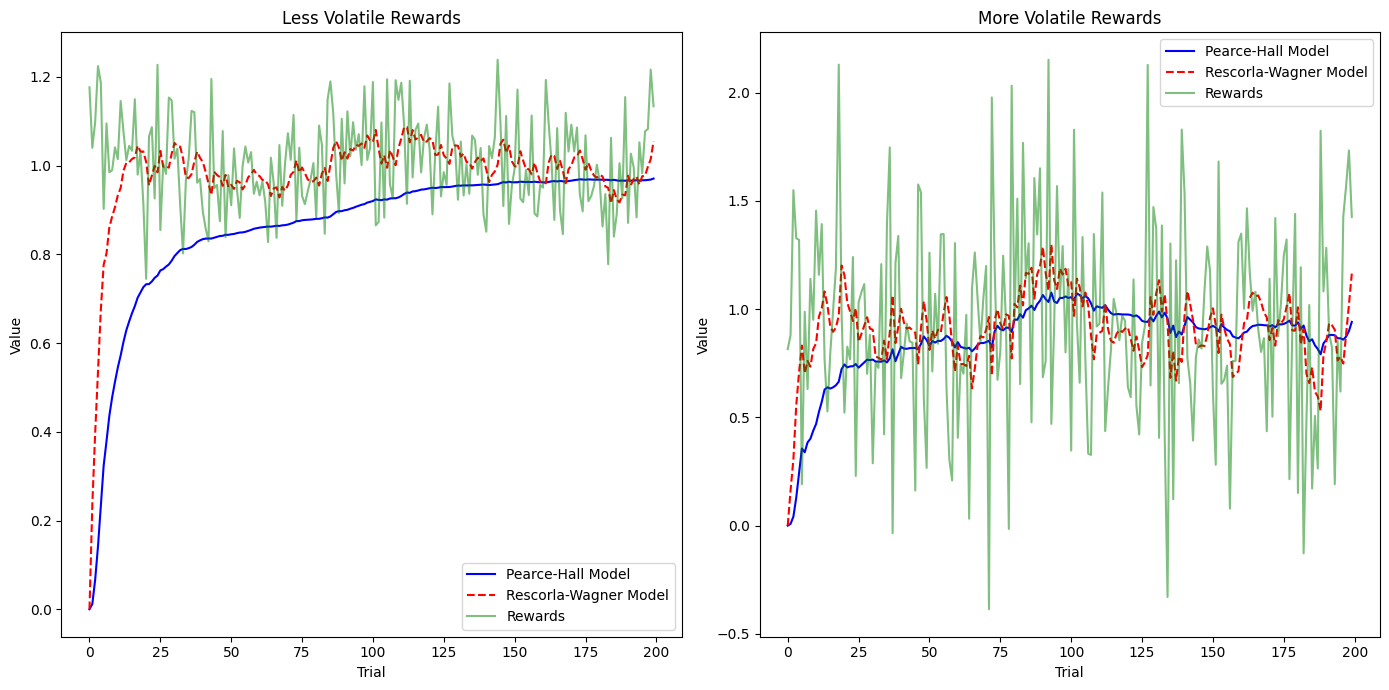

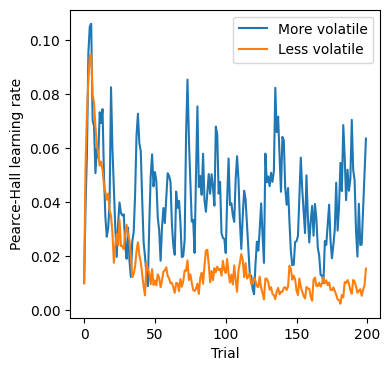

In [ ]:
# Run the models for less volatile rewards
V_pearce_hall_less, alpha_pearce_hall_less, delta_pearce_hall_less = \
    update_pearce_hall(less_volatile_rewards, alpha0_PH, K, eta)
V_rescorla_wagner_less, delta_rescorla_wagner_less = \
    update_rescorla_wagner(less_volatile_rewards, alpha_RW)

# Run the models for more volatile rewards
V_pearce_hall_more, alpha_pearce_hall_more, delta_pearce_hall_more = \
    update_pearce_hall(more_volatile_rewards, alpha0_PH, K, eta)
V_rescorla_wagner_more, delta_rescorla_wagner_more = \
    update_rescorla_wagner(more_volatile_rewards, alpha_RW)

# Plot the results for less volatile rewards
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(V_pearce_hall_less, label='Pearce-Hall Model', color='blue')
plt.plot(V_rescorla_wagner_less, label='Rescorla-Wagner Model', color='red', linestyle='--')
plt.plot(less_volatile_rewards, label='Rewards', color='green', alpha=0.5)
plt.title('Less Volatile Rewards')
plt.xlabel('Trial')
plt.ylabel('Value')
plt.legend()

# Plot the results for more volatile rewards
plt.subplot(1, 2, 2)
plt.plot(V_pearce_hall_more, label='Pearce-Hall Model', color='blue')
plt.plot(V_rescorla_wagner_more, label='Rescorla-Wagner Model', color='red', linestyle='--')
plt.plot(more_volatile_rewards, label='Rewards', color='green', alpha=0.5)
plt.title('More Volatile Rewards')
plt.xlabel('Trial')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

# Plot alpha
plt.figure(figsize=(4, 4))
plt.plot(K*alpha_pearce_hall_more, label='More volatile')
plt.plot(K*alpha_pearce_hall_less, label='Less volatile')
plt.xlabel('Trial')
plt.ylabel('Pearce-Hall learning rate')
plt.legend()

In [ ]:
# calculate MSEs

def value_MSE(actual_V, predicted_V): # MSE, mean abs, ...
    MSE = np.mean(np.square(actual_V - predicted_V))
    return MSE

true_mean = np.ones(n_trials)

MSE_PH_less = valueMSE(true_mean, V_pearce_hall_less)
print('PH less volatile: ', MSE_PH_less)

MSE_RW_less = valueMSE(true_mean, V_rescorla_wagner_less)
print('RW less volatile: ', MSE_RW_less)

print('variance: ', np.var(less_volatile_rewards))

MSE_PH_more = valueMSE(true_mean, V_pearce_hall_more)
print('PH more volatile: ', MSE_PH_more)

MSE_RW_more = valueMSE(true_mean, V_rescorla_wagner_more)
print('RW more volatile: ', MSE_RW_more)

print('variance: ', np.var(more_volatile_rewards))

PH less volatile:  0.04650633524880624
RW less volatile:  0.013331569578305549
variance:  0.010433044724105934
PH more volatile:  0.05299577388658421
RW more volatile:  0.037346119636067224
variance:  0.2224339890091683


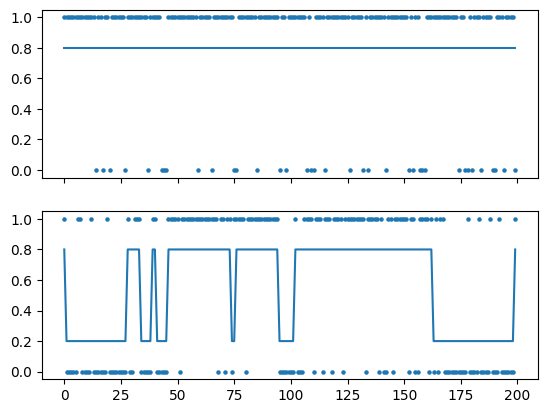

In [ ]:
# get high/low volatility rewards

np.random.seed(2)

def get_switching_rewards(P_reward_highlow, P_switch, n_trials):

    rewards = np.zeros(n_trials)
    P_reward_ = np.zeros(n_trials)
    P_reward_[0] = P_reward_highlow[0]

    for i in range(n_trials-1):
        if np.random.rand() < P_reward_[i]:
            rewards[i] += 1
        if np.random.rand() < P_switch:
            ind_i = np.where(P_reward_highlow==P_reward_[i])[0]
            P_reward_[i+1] = P_reward_highlow[1-ind_i]
        else:
            P_reward_[i+1] = P_reward_[i]

    return rewards, P_reward_

P_reward_highlow = np.array([0.8, 0.2])
P_switch_stable = 0.0
P_switch_volatile = 0.05
n_trials = 2000

volatile_rewards, P_reward_volatile = get_switching_rewards(P_reward_highlow, P_switch_volatile, n_trials)
stable_rewards, P_reward_stable = get_switching_rewards(P_reward_highlow, P_switch_stable, n_trials)

n_plot = 200
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
ax[0].scatter(np.arange(n_plot), stable_rewards[:n_plot], s=5)
ax[0].plot(P_reward_stable[:n_plot])
ax[1].scatter(np.arange(n_plot), volatile_rewards[:n_plot], s=5)
ax[1].plot(P_reward_volatile[:n_plot])

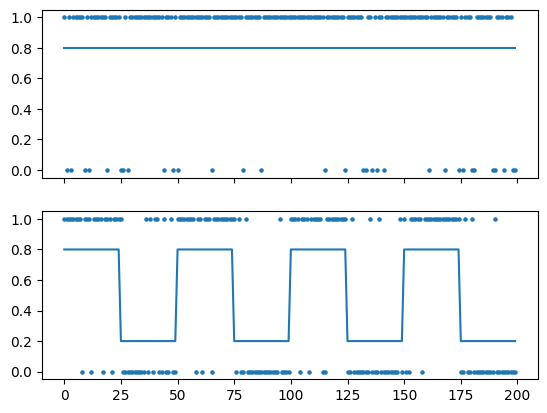

In [ ]:
# get high/low volatility rewards, fixed block length

def get_rewards_fromPs(P_rewards):
    n_trials = P_rewards.shape[0]
    rewards = np.zeros(n_trials)
    for i in range(n_trials-1):
        if np.random.rand() < P_rewards[i]:
            rewards[i] += 1
    return rewards

n_trials = 500
P_reward_stable = 0.8*np.ones(n_trials)
block_len = 25
P_reward_volatile = np.tile(np.concatenate((0.8*np.ones(block_len), 0.2*np.ones(block_len))), \
                            n_trials//(block_len*2))

stable_rewards = get_rewards_fromPs(P_reward_stable)
volatile_rewards = get_rewards_fromPs(P_reward_volatile)

n_plot = 200
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
ax[0].scatter(np.arange(n_plot), stable_rewards[:n_plot], s=5)
ax[0].plot(P_reward_stable[:n_plot])
ax[1].scatter(np.arange(n_plot), volatile_rewards[:n_plot], s=5)
ax[1].plot(P_reward_volatile[:n_plot])


In [ ]:
# Fit the model parameters

def value_cost(actual_V, predicted_V): # MSE, mean abs, ...
    cost = np.mean(np.abs(actual_V - predicted_V))
    return cost

def cost_simulateRW(P_rewards, rewards, alpha):
    V_RW, _ = update_rescorla_wagner(rewards, alpha)
    return value_cost(P_rewards, V_RW)

def cost_simulatePH(P_rewards, rewards, alpha0, K, eta):
    V_PH, _, _ = update_pearce_hall(rewards, alpha0, K, eta)
    return value_cost(P_rewards, V_PH)

stablevolatile_rewards = np.concatenate((stable_rewards, volatile_rewards))
P_sv = np.concatenate((P_reward_stable, P_reward_volatile))

# Rescorla-Wagner
bounds = [[0.01, 0.99]]
cost_RW_less = lambda alpha: cost_simulateRW(P_reward_stable, stable_rewards, alpha)
guess_RW_less = 0.2
res = opt.minimize(cost_RW_less, guess_RW_less, bounds=bounds)
alpha_RW_less = res.x
err_RW_less = res.fun

cost_RW_more = lambda alpha: cost_simulateRW(P_reward_volatile, volatile_rewards, alpha)
guess_RW_more = 0.4
res = opt.minimize(cost_RW_more, guess_RW_more, bounds=bounds)
alpha_RW_more = res.x
err_RW_more = res.fun

cost_RW_both = lambda alpha: cost_simulateRW(P_sv, stablevolatile_rewards, alpha)
guess_RW_both = 0.3
res = opt.minimize(cost_RW_both, guess_RW_both, bounds=bounds)
alpha_RW_both = res.x
err_RW_both = res.fun

print(alpha_RW_less, alpha_RW_more, alpha_RW_both)
print(err_RW_less, err_RW_more, err_RW_both)

# Pearce-Hall
bounds = [[0.01, 0.99], [0.01, 1], [0.01, 0.99]] # alpha0, K, eta
cost_PH_less = lambda params: cost_simulatePH(P_reward_stable, stable_rewards, \
                                                params[0], params[1], params[2])
guess_PH_less = [0.1, 0.8, 0.1]
res = opt.minimize(cost_PH_less, guess_PH_less, bounds=bounds)
params_PH_less = res.x
err_PH_less = res.fun

cost_PH_more = lambda params: cost_simulatePH(P_reward_volatile, volatile_rewards, \
                                                params[0], params[1], params[2])
guess_PH_more = [0.1, 0.8, 0.6]
res = opt.minimize(cost_PH_more, guess_PH_more, bounds=bounds)
params_PH_more = res.x
err_PH_more = res.fun

cost_PH_both = lambda params: cost_simulatePH(P_sv, stablevolatile_rewards, \
                                                params[0], params[1], params[2])
guess_PH_both = [0.1, 0.8, 0.4]
res = opt.minimize(cost_PH_both, guess_PH_both, bounds=bounds)
params_PH_both = res.x
err_PH_both = res.fun

print(params_PH_less, params_PH_more, params_PH_both)
print(err_PH_less, err_PH_more, err_PH_both)

[0.04350473] [0.2275828] [0.16614785]
0.06624722193110097 0.16687030244877812 0.13254596224435344
[0.99       0.06369805 0.0337814 ] [0.99       0.41192864 0.67706209] [0.99       0.31792781 0.389409  ]
0.045476323846036615 0.1584152607924429 0.12646377848487397


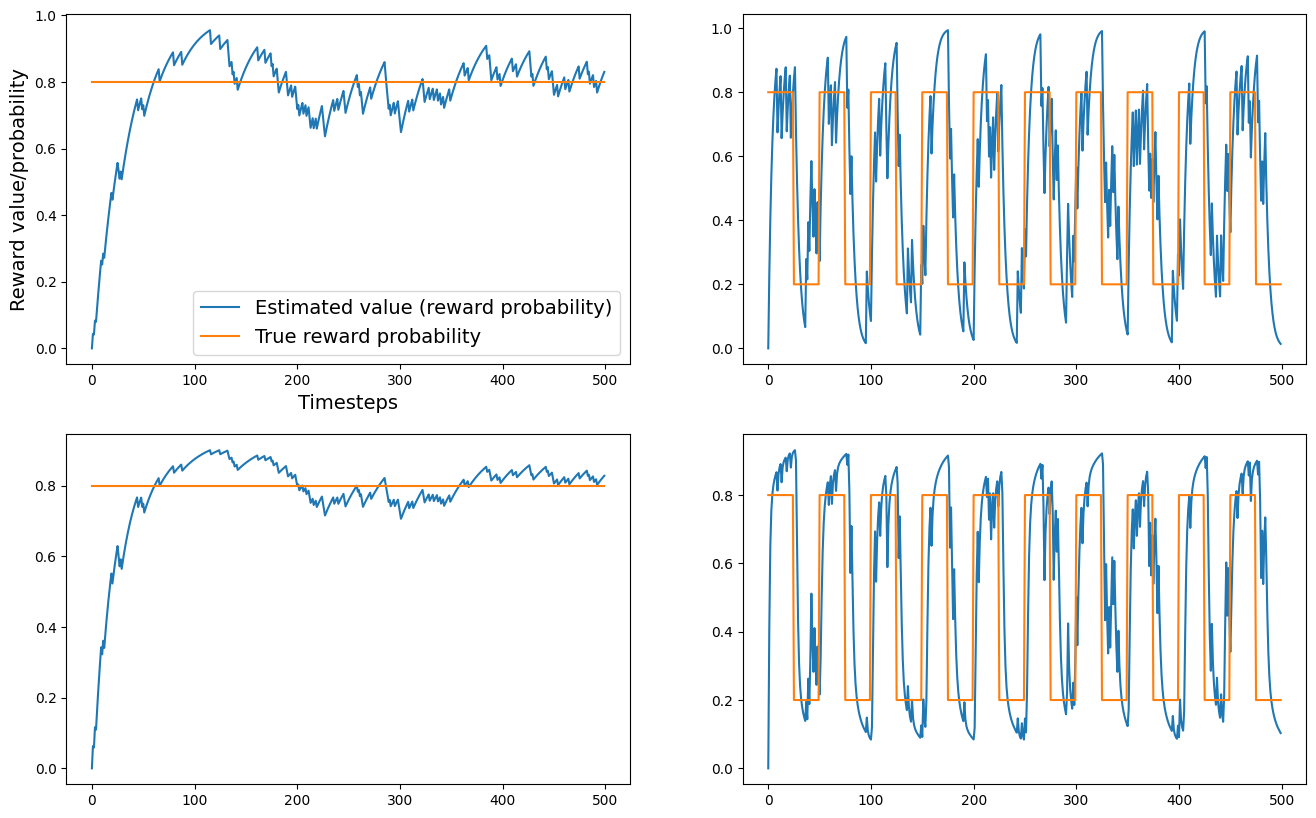

In [ ]:
# Run the models for less volatile rewards

V_PH_stable, alpha_PH_stable, delta_PH_stable = \
    update_pearce_hall(stable_rewards, params_PH_less[0], params_PH_less[1], params_PH_less[2])

V_RW_stable, delta_RW_stable = \
    update_rescorla_wagner(stable_rewards, alpha_RW_less)

# Run the models for more volatile rewards

V_PH_volatile, alpha_PH_volatile, delta_PH_volatile = \
    update_pearce_hall(volatile_rewards, params_PH_more[0], params_PH_more[1], params_PH_more[2])

V_RW_volatile, delta_RW_volatile = \
    update_rescorla_wagner(volatile_rewards, alpha_RW_more)

fig, ax = plt.subplots(2,2, figsize=(16,10))
n_plot = 500
ax[0,0].plot(V_RW_stable[:n_plot], label='Estimated value (reward probability)')
ax[0,0].plot(P_reward_stable[:n_plot], label='True reward probability')
ax[0,0].set_ylabel('Reward value/probability', fontsize=14)
ax[0,0].set_xlabel('Timesteps', fontsize=14)

ax[0,1].plot(V_RW_volatile[:n_plot])
ax[0,1].plot(P_reward_volatile[:n_plot])

ax[1,0].plot(V_PH_stable[:n_plot])
ax[1,0].plot(P_reward_stable[:n_plot])

ax[1,1].plot(V_PH_volatile[:n_plot])
ax[1,1].plot(P_reward_volatile[:n_plot])

ax[0,0].legend(fontsize=14)
plt.savefig('RW_PH_stable_volatile.png', dpi=300)

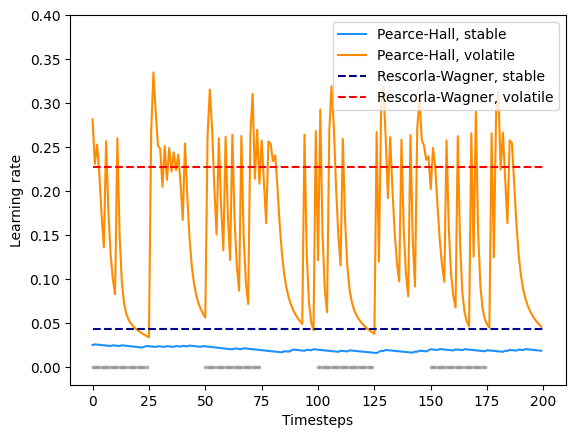

In [ ]:
# plot learning rates

nplot = 200
plt.plot(params_PH_less[1]*alpha_PH_stable[-nplot:], c='dodgerblue', label='Pearce-Hall, stable')
plt.plot(params_PH_more[1]*alpha_PH_volatile[-nplot:], c='darkorange', label='Pearce-Hall, volatile')

plt.hlines(alpha_RW_less, 0, nplot, ls='--', color='darkblue', label='Rescorla-Wagner, stable')
plt.hlines(alpha_RW_more, 0, nplot, ls='--', color='r', label='Rescorla-Wagner, volatile')

label_vol_x = np.where(P_reward_volatile[-nplot:]==0.8)[0]
label_vol_y = np.zeros(label_vol_x.shape[0])
plt.scatter(label_vol_x, label_vol_y, c='grey', alpha=0.5, s=3)

plt.ylim(-0.02, 0.4)
plt.ylabel('Learning rate')
plt.xlabel('Timesteps')
plt.legend(loc='upper right')

plt.savefig('./PH_RW_learningrate_stablevolatile.png', dpi=300)

In [ ]:
# simulate lots of trials
np.random.seed(2)
n_trials = 20000
rewards = np.random.normal(1, 0.5, n_trials)  # high noise
V_PH, alpha_PH, delta_PH = update_pearce_hall(rewards, alpha0_PH, K, eta)

In [ ]:
# get indices of different PE change types

d_deltaPH = delta_PH[1:] - delta_PH[:-1]
d_alphaPH = alpha_PH[1:] - alpha_PH[:-1]
d_valuePH = V_PH[1:] - V_PH[:-1]

pos_delta = np.where(delta_PH[:-1] > 0)[0]
neg_delta = np.where(delta_PH[:-1] < 0)[0]
inc_delta = np.where(d_deltaPH > 0)[0]
dec_delta = np.where(d_deltaPH < 0)[0]

inc_pos_delta = np.intersect1d(pos_delta, inc_delta)
dec_pos_delta = np.intersect1d(pos_delta, dec_delta)
inc_neg_delta = np.intersect1d(neg_delta, inc_delta)
dec_neg_delta = np.intersect1d(neg_delta, dec_delta)

sign_change_inds = np.where(np.sign(delta_PH[1:]) - np.sign(delta_PH[:-1]) != 0)[0]

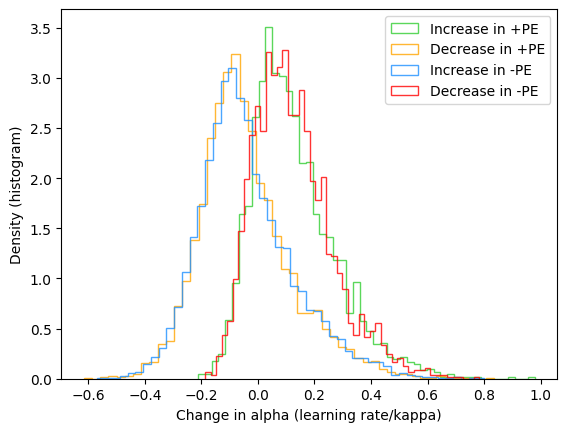

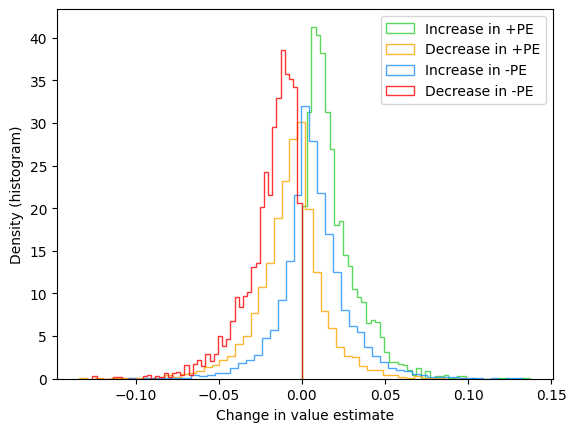

In [ ]:
colors = ['limegreen', 'orange', 'dodgerblue', 'r']
opacity = 0.8

nbins = 50
plt.figure()
plt.hist(d_alphaPH[inc_pos_delta[:-1]+1], color=colors[0], alpha=opacity, density=True, label='Increase in +PE', \
            histtype='step', bins=nbins)
plt.hist(d_alphaPH[dec_pos_delta[:-1]+1], color=colors[1], alpha=opacity, density=True, label='Decrease in +PE', \
            histtype='step', bins=nbins)
plt.hist(d_alphaPH[inc_neg_delta[:-1]+1], color=colors[2], alpha=opacity, density=True, label='Increase in -PE', \
            histtype='step', bins=nbins)
plt.hist(d_alphaPH[dec_neg_delta[:-1]+1], color=colors[3], alpha=opacity, density=True, label='Decrease in -PE', \
            histtype='step', bins=nbins)
plt.xlabel('Change in alpha (learning rate/kappa)')
plt.ylabel('Density (histogram)')
plt.legend()
plt.savefig('./dAlpha_PEs_hist.png', dpi=300)

plt.figure()
plt.hist(d_valuePH[inc_pos_delta[:-1]+1], color=colors[0], alpha=opacity, density=True, label='Increase in +PE', \
            histtype='step', bins=nbins)
plt.hist(d_valuePH[dec_pos_delta[:-1]+1], color=colors[1], alpha=opacity, density=True, label='Decrease in +PE', \
            histtype='step', bins=nbins)
plt.hist(d_valuePH[inc_neg_delta[:-1]+1], color=colors[2], alpha=opacity, density=True, label='Increase in -PE', \
            histtype='step', bins=nbins)
plt.hist(d_valuePH[dec_neg_delta[:-1]+1], color=colors[3], alpha=opacity, density=True, label='Decrease in -PE', \
            histtype='step', bins=nbins)
plt.xlabel('Change in value estimate')
plt.ylabel('Density (histogram)')
plt.legend()
#plt.savefig('./dValue_PEs_hist.png', dpi=300)

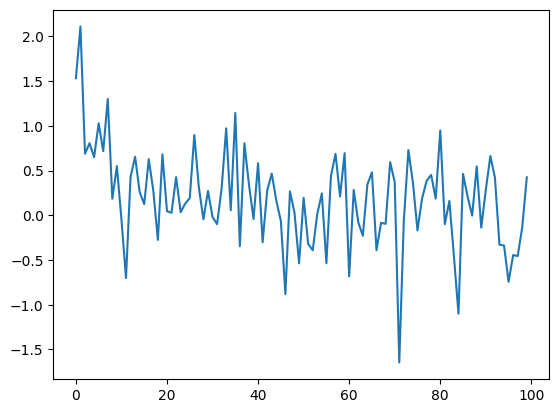

In [ ]:
plt.plot(delta_PH[:100])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3569eb68-a6a6-4122-9c3d-498e88f49235' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>